<a href="https://colab.research.google.com/github/RT-86/Project-Business-Statistics-E-news-Express/blob/main/ENews_Express_Learner_Notebook_Full_Code_Aarthy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives


**Problem Statement**

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected.

Objective is to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?


## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.7 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to help with statistical analysis
import scipy.stats as stats

# Function for handling normal distribution and statistical calculation
from scipy.stats import norm


## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# code to read the data
df=pd.read_csv('/content/drive/MyDrive/Python/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#Viewing the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#Viewing the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Checking the shape of the dataset
df.shape

(100, 6)

The dataset contains 100 rows and 6 columns.

In [ ]:
#Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 4 categorical columns and two numeric columns in the dataset.

In [ ]:
#Getting the statistical summary for the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Observations:**

There are 100 unique users.

The average time spent on the page is about 5.38 minutes with a standard deviation of 2.38 minutes.

50% of the users spent about 5.42 minutes on the page.

The time spent on the page ranges from minimum of 0.19 minutes and the maximum time spent on the page was 10.71 minutes

In [ ]:
#Chart for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations:**

There are no null values in this dataset.

### Univariate Analysis

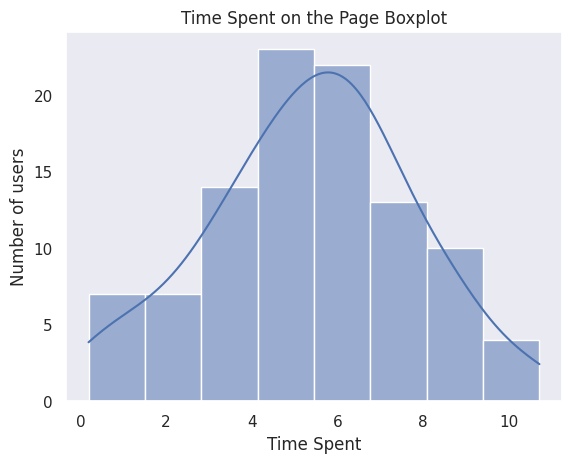

In [ ]:
#Chart to show Distribution of the time the spent on the landing page
sns.set(style='dark')
sns.histplot(data=df, x='time_spent_on_the_page',kde='hex' )
plt.title('Time Spent on the Page Boxplot')
plt.xlabel('Time Spent')
plt.ylabel('Number of users')
plt.show()

**Observations:**

The time spent on the page appears to be normally distributed.

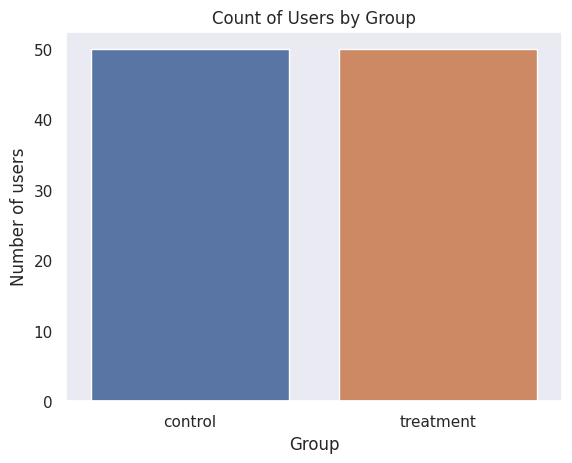

group
control      50
treatment    50
Name: user_id, dtype: int64

In [ ]:
#Chart to show Counter of users by Group
sns.set(style='dark')
sns.countplot(data=df,x='group',hue='group')
plt.title('Count of Users by Group')
plt.xlabel('Group')
plt.ylabel('Number of users')
plt.show()
print('\n')

df.groupby('group')['user_id'].count()

**Observations:**

There are 50 users in the control group and 50 users in the treatment group.

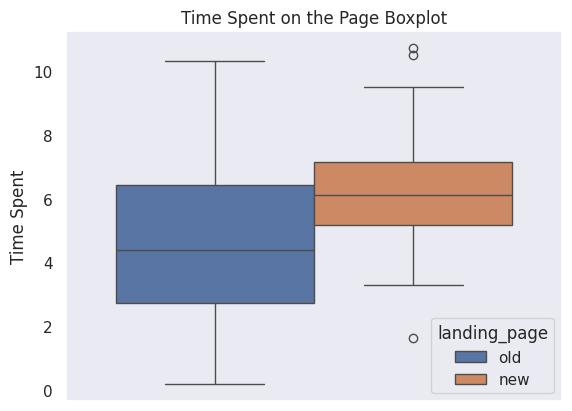

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


In [ ]:
# Chart to show Time Spent on the Landing Page
sns.set(style='dark')
sns.boxplot(data=df, y='time_spent_on_the_page', hue='landing_page' )
plt.title('Time Spent on the Page Boxplot')
plt.ylabel('Time Spent')
plt.show()
print('\n')

df.groupby('landing_page')['time_spent_on_the_page'].describe()

**Observations:**

There are 50 users using the new landing page and 50 users using the old landing page.

The average and median time spent by the users in the new landing page is more than the old landing page.

There are 3 outliers in the time spent in the new landing page.



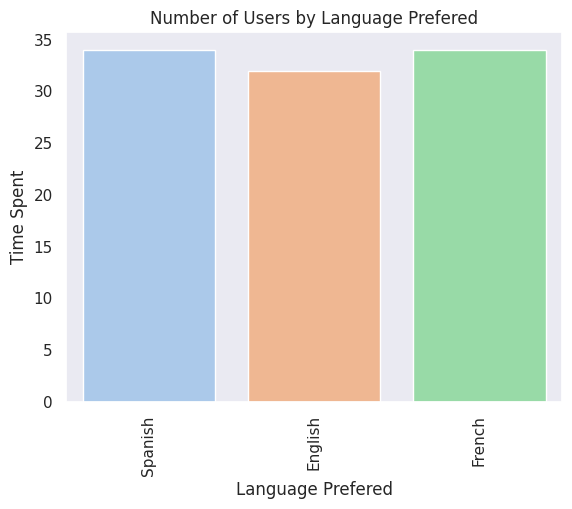

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

In [ ]:
# Chart to show Number of Users by Language Prefered
sns.countplot(data=df,x='language_preferred',hue='language_preferred',palette='pastel')
plt.title('Number of Users by Language Prefered')
plt.xlabel('Language Prefered')
plt.ylabel('Time Spent')
plt.xticks(rotation=90)
plt.show()

print('\n')

df['language_preferred'].value_counts()



**Observations:**

The graph shows Spanish and French had the most amount of entries with 34 each and English had the least amount of entries with 32.

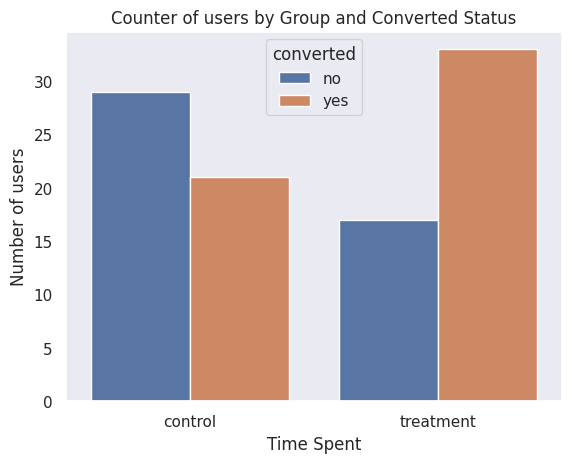

group      converted
control    no           58.0
           yes          42.0
treatment  yes          66.0
           no           34.0
Name: proportion, dtype: float64

In [ ]:
# Chart to show Count of users by Group and Converted Status
sns.countplot(data=df,x='group',hue='converted')
plt.title('Count of users by Group and Converted Status')
plt.xlabel('Time Spent')
plt.ylabel('Number of users')
plt.show()
print('\n')

df.groupby('group')['converted'].value_counts(normalize=True)*100

**Observations:**

The graph shows that more people converted to subscribers in the treatment group comapred to the control group.

### Bivariate Analysis

<Figure size 1500x700 with 0 Axes>

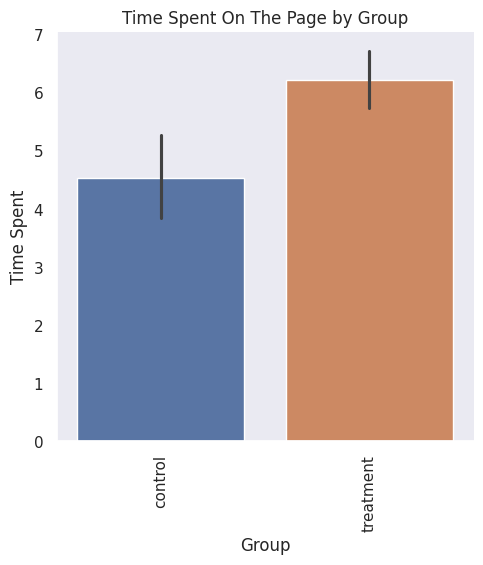

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

In [ ]:
#Chart to show Time Spent On The Page by Group
plt.figure(figsize = (15,7))
sns.catplot(data = df, x = 'group', y = 'time_spent_on_the_page', kind='bar',hue='group')
plt.title('Time Spent On The Page by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent')
plt.xticks(rotation=90)
plt.show()

df.groupby(['group'])['time_spent_on_the_page'].mean()

**Observations:**
Users in the treatment group spent more time on the page as than the  participants in the control group.

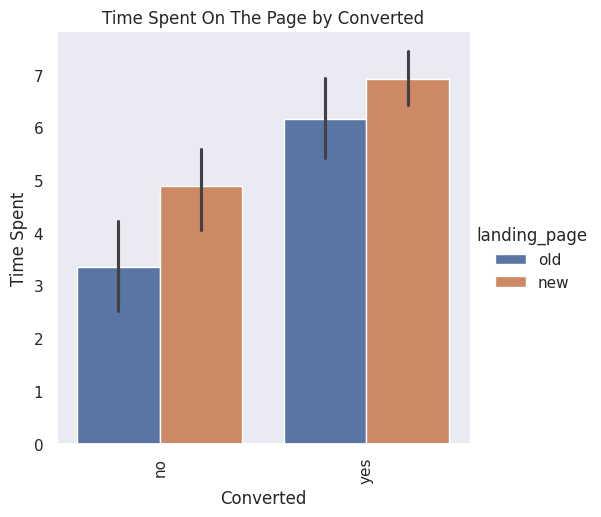

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

In [ ]:
# Chart to show Time Spent On The Page by Converted Status
sns.catplot(data = df, y= 'time_spent_on_the_page', x = 'converted', hue='landing_page',kind='bar')
plt.title('Time Spent On The Page by Converted')
plt.xlabel('Converted')
plt.ylabel('Time Spent')
plt.xticks(rotation=90)
plt.show()

df.groupby(['converted'])['time_spent_on_the_page'].mean()

**Observations:**

As per the graph users who spent more time in the new landing page converted to a subscriber.

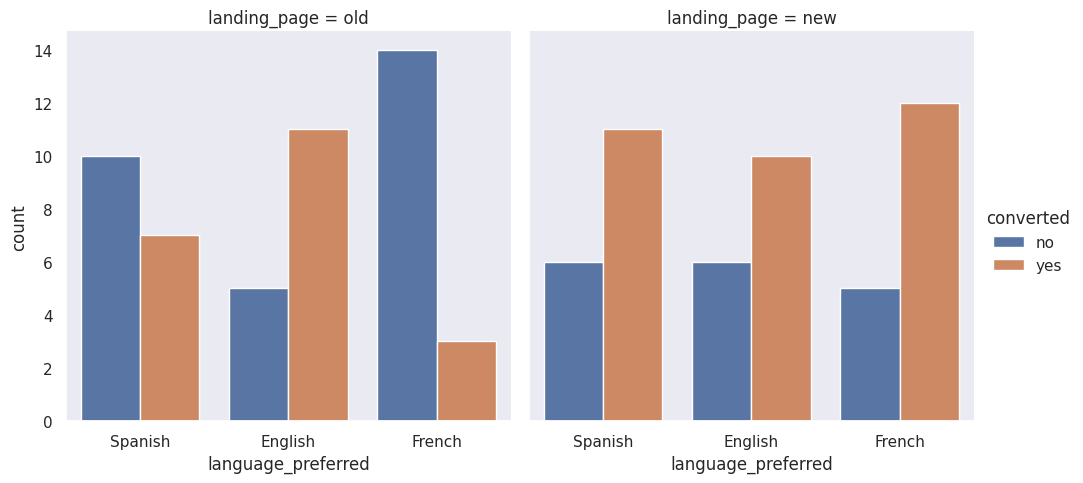

In [ ]:
# Chart to show converted users by language in both the landing pages

sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count')


**Observations:**

As per the graph users using old landing page who chose Spanish and French did not get convert.

Users using new landing page across all language preferences converted to subscribers when.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

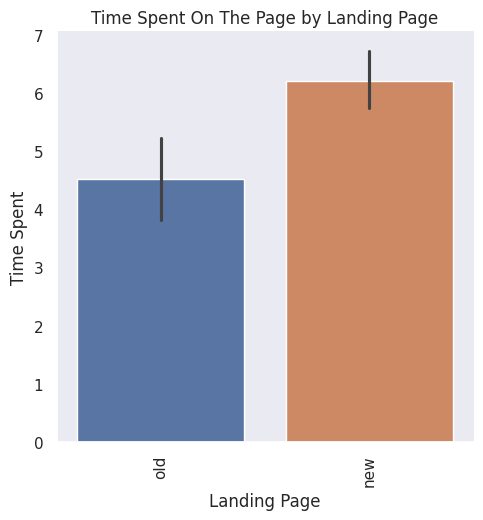

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

In [ ]:
sns.catplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', kind='bar',hue='landing_page')
plt.title('Time Spent On The Page by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent')
plt.xticks(rotation=90)
plt.show()
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

**Observation:**

Yes, as per the graph users spend more time in the new landing than the old landing page

### Step 1: Define the null and alternate hypotheses

Null Hypotheses 𝐻0 : The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

Mu1=Mu2

Alternat Hypotheses 𝐻𝑎 : The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.  

Mu1>Mu2

### Step 2: Select Appropriate test

Here we are comparing 2 independent variables.

 1.Time spent on new page.

 2.Time spent on old page.

**Two Independent Sample T-test for Equality of Means - Unequal Std Deviation**  will be the appropriate test.


### Step 3: Decide the significance level

As per given information significance level of 5% or Alpha=0.05

### Step 4: Collect and prepare data

In [ ]:
# Time spent by users for on new and old landing pages
time_new=df[df['landing_page']=='new']['time_spent_on_the_page']
time_old=df[df['landing_page']=='old']['time_spent_on_the_page']

# Sample mean time spent by users for on new and old landing page
meantime_new=df[df['landing_page']=='new']['time_spent_on_the_page'].mean()
meantime_old=df[df['landing_page']=='old']['time_spent_on_the_page'].mean()
print('Sample mean of time spent in new page:', meantime_new)
print('Sample mean of time spent in old page:', meantime_old)

# Sample Standard Deviation of time spent by users for on new and old landing page

std_new=df[df['landing_page']=='new']['time_spent_on_the_page'].std()
std_old=df[df['landing_page']=='old']['time_spent_on_the_page'].std()
print('Sample standard deviation of time spent in new page:', std_new)
print('Sample standard deviation of time spent in old page:', std_new)


Sample mean of time spent in new page: 6.2232
Sample mean of time spent in old page: 4.532400000000001
Sample standard deviation of time spent in new page: 1.8170310387878263
Sample standard deviation of time spent in old page: 1.8170310387878263


Assumptions:
1. Continuous data -  Yes, time is a continuous variable.
2. Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
3.  Independent populations - The two samples are independent. There is no relationship between the individuals in one sample as compared to the other.
4. Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
5. Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

### Step 5: Calculate the p-value

In [ ]:
# import the required fuction
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(time_new, time_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value' ,p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value' ,p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is much less than the level of significance of 5%, the null hypothesis is rejected.

This means that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Perform Visual Analysis**

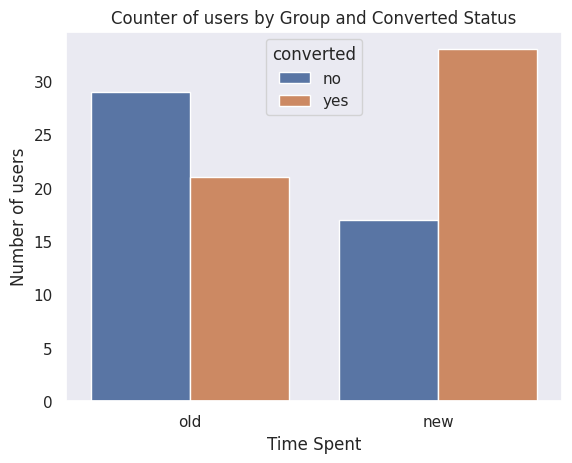

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

In [ ]:
sns.countplot(data=df,x='landing_page',hue='converted')
plt.title('Counter of users by Group and Converted Status')
plt.xlabel('Time Spent')
plt.ylabel('Number of users')
plt.show()
print('\n')

df.groupby('landing_page')['converted'].value_counts()

**Observations:**

As per the graph users on the new landing page are more likely to convert to subscribers than users on the old landing page.

### Step 1: Define the null and alternate hypotheses


Null Hypotheses 𝐻0 : The proportion of users who visit the new landing page and get converted is equal to the proportion of users who visit the old landing page and get converted

p1=p2

Alternat Hypotheses 𝐻𝑎 : The proportion of users who visit the new landing page and get converted is greater to the proportion of users who visit the old landing page and get converted

p1>p2

### Step 2: Select Appropriate test

This is a one-tailed test, concerning two populationproportion p1 and p2. So Two proportions z-test is appropriate for this.

 1.The proportion of users who visit the new landing page and get converted

 2.The proportion of users who visit the old landing page and get converted




###Step 3: Decide the significance level

As per given information significance level of 5% or Alpha=0.05

###Step 4: Collect and prepare data

In [ ]:
# Proportion of converted users in the new and old landing page
p_new = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
p_old = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']

print('Proportion of converted users in the new landing page:', p_new)
print('Proportion of converted users in the old landing page:', p_old)

# Sample sized of new and old landing page
p_new_size = df[df['landing_page'] == 'new']['converted'].count()
p_old_size = df[df['landing_page'] == 'old']['converted'].count()
print('Number of converted users in the new landing page:', p_new_size)
print('Number of converted users in the old landing page:', p_old_size)


Proportion of converted users in the new landing page: 33
Proportion of converted users in the old landing page: 21
Number of converted users in the new landing page: 50
Number of converted users in the old landing page: 50


**Assumptions**

Binomally distributed population - Yes, a user is either converted or not converted.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Can the binomial distribution approximated to normal distribution - Yes.


###Step 5: Calculate the p-value


In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([p_new,p_old], [p_new_size,p_old_size], alternative='larger')
print('The p-value is ', p_value)

The p-value is  0.008026308204056278


###Step 6: Compare the p-value with  𝛼

In [ ]:
if p_value < 0.05:
    print(f'As the p-value', p_value, 'is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


###Step 7: Draw inference

The p-value is much less than the level of significance at 5%. So the null hypothesis is rejected.

This means that we have significance evidence to say proportion of users who visit the new landing page and get converted greater to the proportion of users who visit the old landing page and get converted.

## 3. Is the conversion and preferred language are independent or related?

###Perform Visual Analysis

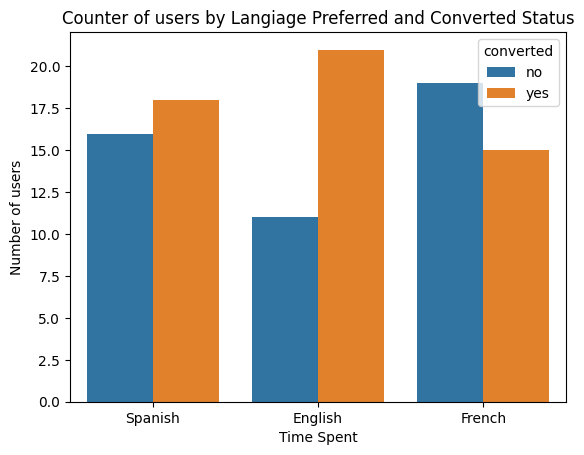

language_preferred  converted
English             yes          65.625000
                    no           34.375000
French              no           55.882353
                    yes          44.117647
Spanish             yes          52.941176
                    no           47.058824
Name: proportion, dtype: float64

In [ ]:
sns.countplot(data=df,x='language_preferred',hue='converted') #added hue for having different colors for the values)
plt.title('Counter of users by Language Preferred and Converted Status')
plt.xlabel('Time Spent')
plt.ylabel('Number of users')
plt.show()
print('\n')

df.groupby('language_preferred')['converted'].value_counts(normalize=True)*100




**Observation:**

The converted status doesn't seem to have much of an effect on French and Spanish speaking users, but does effect the English speaking users as the converted users are high for Engligh language.

###Step 1: Define the null and alternate hypotheses

  Null Hypothesis H0: Conversion and preferred language are independent.  
  Alternate Hypothesis H*a*:  Conversion and preferred language are dependent.

###Step 2: Select Appropriate test

We are interested to know whether the two categorical variables are independent.

Chi-Square Test for Independence is the appropriate test.

###Step 3: Decide the significance level

As per given information significance level of 5% or Alpha=0.05

###Step 4: Collect and prepare data

In [ ]:
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
print(contingency_table)

converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


#####Assumptions:
Categorical variables - Yes

Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

###Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


###Step 6: Compare the p-value with  𝛼

In [ ]:
if p_value < 0.05:
    print(f'As the p-value',p_value,'is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw inference

Since the p-value is greater than the level of signifcance of 5%, we fail to reject null hypothesis.

This means that that the conversion and preferred language are independent based on the evidences

## 4. Is the time spent on the new page same for the different language users?

###Perform Visual Analysis

Text(0, 0.5, 'Time Spent')

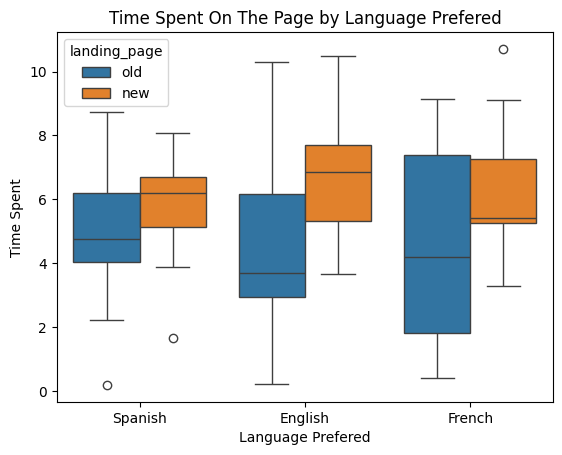

In [ ]:
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page',hue='landing_page')
plt.title('Time Spent On The Page by Language Prefered')
plt.xlabel('Language Prefered')
plt.ylabel('Time Spent')

###Step 1: Define the null and alternate hypotheses

Null Hypotheses *H0*: The mean time spent on the new lading page is the same across all preferred langauges.

Alternate Hypotheses *Ha*:  At least one of the mean times spent on the new landing page is different amongst the preferred languages.

###Step 2: Select Appropriate test

Analysis of Variance (ANOVA) is used to determine whether the means of more than two independent populations are significantly different.

One-way ANOVA is used when the response variable depends on a single factor.  So for our case it will be appropriate.


###Step 3: Decide the significance level

As per given information significance level of 5% or Alpha=0.05

###Step 4: Collect and prepare data

In [ ]:
df_new = df[df['landing_page'] == 'new']
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

For ANOVA test, the normality and equality of variance assumptions need to be checked.
*   For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
*   For equality of variance, Levene test is applied to the response variable.


#####Shapiro-Wilk’s test

Null hypothesis H0: Time spent does not follownormal distribution against

Alternative hypothesis Ha: Time spent follow a normal distribution


In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w,p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis.That is the time spent follows the normal distribution.



#####Levene’s test

Null hypothesis H0: All the population variances are equal

Alternative hypothesis Ha:  At least one variance is different from the rest


In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = stats.levene( df_new['time_spent_on_the_page'][df['language_preferred']=="Spanish"],
                                   df_new['time_spent_on_the_page'][df['language_preferred']=="English"],
                                   df_new['time_spent_on_the_page'][df['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since p-value of the test is very large, we fail to reject the null hypothesis.That is at least one variance is different from the rest.

##### Asuumptions

The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.

Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.

Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

###Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' , p_value)

The p-value is  0.43204138694325955


###Step 6: Compare the p-value with  𝛼

In [ ]:
if p_value < 0.05:
    print(f'As the p-value',p_value,'is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value', p_value, 'is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


###Draw Inference

Since the p-value is greater than the level of signifcance of 5%, we fail to reject null hypothesis.
This means that that the conversion and preferred language are independet.

## Conclusion and Business Recommendations

###Conclusions and recommendations based on hypothesis tests




 **1. Mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.**

Compared the time spent by the users on the new landing page and the old landing page. Based on a 2-sample independent t-test,  the p-value is much less than the level of significance of 5%. Therefore, the null hypothesis is rejected.This means that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

  **Recommendation:**

Based on the above conclusion, time spent on the new landing page is greater than the time spent on the old landing page is evidence that users prefer it.
I recommend that E-News Express should fully implement the new landing page.  In order to increase the user engagement.


**2.Conversion rate of the new landing page is greater than the conversion rate of the old landing**

To compare the conversion rate for the new page and the conversion rate of the old page, a two-proportion z-test was performed. A p-value was less than the level of significance of 5%. Therefore, the null hypothesis is rejected. Hence there is significant evidence that the conversion rate of the new landing page was greater than the conversion rate of the old landing page.

  **Recommendation**

The new landing page has an increased conversion rate, therefore, more traffic should be directed towards it as it has more opportunity to increase membership conversion for  E-News Express.


**3.Conversion status is independent of the preferred language of the landing page and mean time spent on the new landing page is relatively similar for all languages**
By performing chi-square test for independence to check if the conversion status and the preferred language of the landing page are independent, we found that p-value was more than the level of significance of 5%. Therefore, the null hypothesis is failed to be rejected. We conclude that the conversion and preferred language are independent based on the evidence.

Also, as per the one-way ANOVA test performed the mean time spent on the new landing page was relatively similar across all the preferred languages.

  **Recommendation**
E-News Express shoul implement new landing page incorporating all the exiting preferred language. As there is no signficant difference between the average time spent on the new page across the preferred languages, the conversion to subscribers will be the similar throughout. It can also consider adding more languages to the portal to reach a wider audience.








___